# Determining if One-Round is Equivalent to Winner-Peeling

## Setting Up Borda Counts Infrastructure

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
NUM_VOTERS = 50
NUM_CANDIDATES = 10
CANDIDATES = np.arange(NUM_CANDIDATES)

In [3]:
VOTERS = []
for _ in range(NUM_VOTERS):
    variable = random.uniform(-1, 1)
    ut_func = lambda var: lambda x: 0.5 + 0.5 * np.sin((x - var) * np.pi)
    ut_func = ut_func(variable)
    VOTERS.append(ut_func)

In [4]:
def borda_scores(voters, candidates, distr="uniform", beta=1.0):
    '''Not optimal, but it works.'''
    borda_scores = np.zeros(len(candidates))
    if distr == "uniform":
        for j, candidate in enumerate(candidates):
            for alternate in candidates:
                exp = 0
                for voter in voters:
                    exp += 1 / len(voters) * 1 / (1 + np.exp(-beta * (voter(candidate) - voter(alternate))))
                
                borda_scores[j] += exp / len(candidates)
    return borda_scores

In [5]:
borda_scores(VOTERS, CANDIDATES)

array([0.48094775, 0.51905225, 0.48094775, 0.51905225, 0.48094775,
       0.51905225, 0.48094775, 0.51905225, 0.48094775, 0.51905225])

## Testing Out Funcionts

In [6]:
VOTERS_EASY = []
random.seed(0)
for _ in range(NUM_VOTERS):
    variable = random.uniform(0, 1)
    print(variable)
    ut_func = lambda var: lambda x: 2 / np.pi * np.sin(var * x)
    ut_func = ut_func(variable)
    VOTERS_EASY.append(ut_func)

0.8444218515250481
0.7579544029403025
0.420571580830845
0.25891675029296335
0.5112747213686085
0.4049341374504143
0.7837985890347726
0.30331272607892745
0.4765969541523558
0.5833820394550312
0.9081128851953352
0.5046868558173903
0.28183784439970383
0.7558042041572239
0.6183689966753316
0.25050634136244054
0.9097462559682401
0.9827854760376531
0.8102172359965896
0.9021659504395827
0.3101475693193326
0.7298317482601286
0.8988382879679935
0.6839839319154413
0.47214271545271336
0.1007012080683658
0.4341718354537837
0.6108869734438016
0.9130110532378982
0.9666063677707588
0.47700977655271704
0.8653099277716401
0.2604923103919594
0.8050278270130223
0.5486993038355893
0.014041700164018955
0.7197046864039541
0.39882354222426875
0.824844977148233
0.6681532012318508
0.0011428193144282783
0.49357786646532464
0.8676027754927809
0.24391087688713198
0.32520436274739006
0.8704712321086546
0.19106709150239054
0.5675107406206719
0.23861592861522019
0.9675402502901433


In [7]:
VOTERS_EASY[0]

<function __main__.<lambda>.<locals>.<lambda>(x)>

In [8]:
import inspect

In [9]:
CANDIDATES = np.arange(10)

In [10]:
BS = borda_scores(VOTERS_EASY, CANDIDATES)

In [11]:
BS

array([0.46012096, 0.53950936, 0.57859003, 0.56492507, 0.51528078,
       0.46665365, 0.44534462, 0.45624088, 0.48072375, 0.49261091])

In [12]:
variable = 90

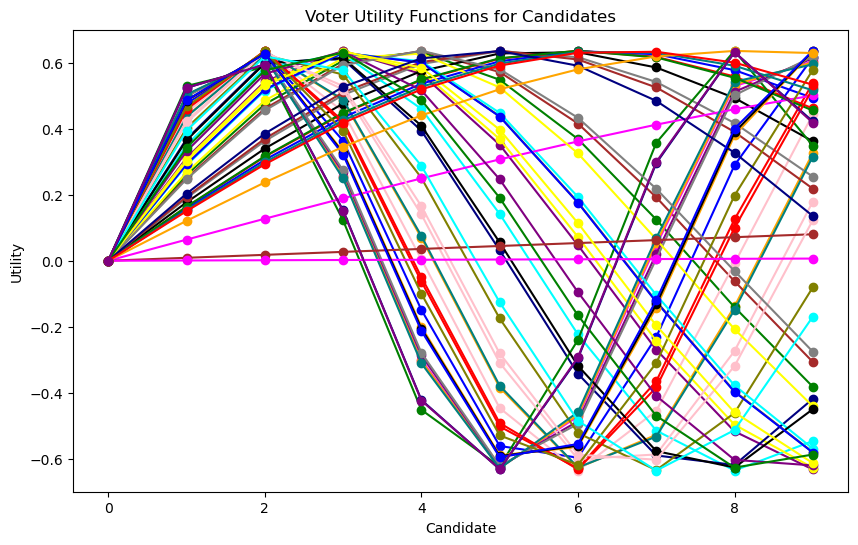

In [13]:
plt.figure(figsize=(10, 6))
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
        'magenta', 'yellow', 'black', 'teal', 'navy']
for i, voter in enumerate(VOTERS_EASY):
    utilities = [voter(c) for c in CANDIDATES]
    plt.plot(CANDIDATES, utilities, color=cmap[i % len(cmap)], marker='o', label=f'Voter {i+1}' if i < 10 else "")

# plt.plot(CANDIDATES, BS, label='Borda Scores', color='red', linewidth=2, marker='o')
plt.title('Voter Utility Functions for Candidates')
plt.xlabel('Candidate')
plt.ylabel('Utility')
plt.show()

Text(0.5, 1.0, 'Borda Scores for Candidates')

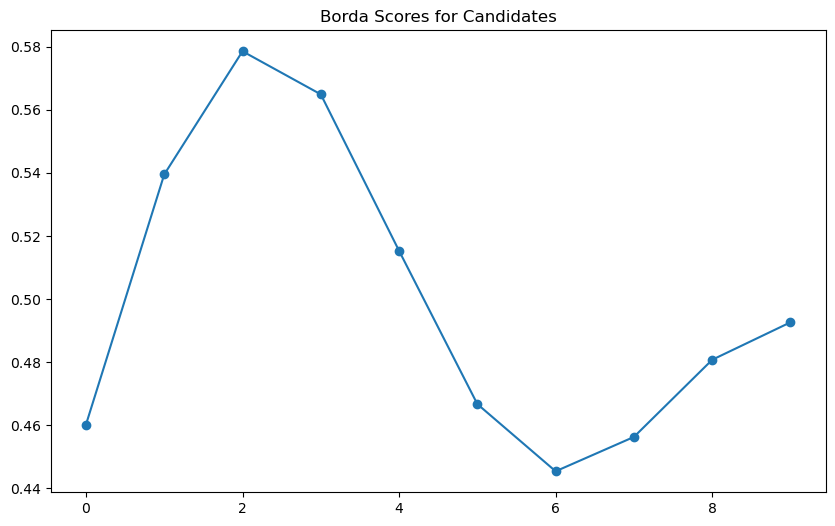

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(CANDIDATES, BS, label='Original Voters', marker='o')
plt.title('Borda Scores for Candidates')

## Generating Rankings

In [15]:
BS = borda_scores(VOTERS_EASY, CANDIDATES)

In [16]:
ranking = np.argsort(-BS)

In [17]:
ranking

array([2, 3, 1, 4, 9, 8, 5, 0, 7, 6])

In [18]:
BS

array([0.46012096, 0.53950936, 0.57859003, 0.56492507, 0.51528078,
       0.46665365, 0.44534462, 0.45624088, 0.48072375, 0.49261091])

In [19]:
import copy

winner_peeling = []
cands = copy.deepcopy(CANDIDATES)
for _ in range(NUM_CANDIDATES):
    BS = borda_scores(VOTERS_EASY, cands)
    winner = np.argmax(BS)
    winner_peeling.append(winner)
    cands = cands[cands != winner]  # Remove winner from candidates

In [20]:
winner_peeling

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

## Less Well-Behaved Voters

In [21]:
VOTERS_X = []
for _ in range(1):
    variable = random.uniform(0, 1)
    ut_func = lambda var: lambda x: 2 / np.pi * np.sin(var * x)
    ut_func = ut_func(variable)
    VOTERS_X.append(ut_func)

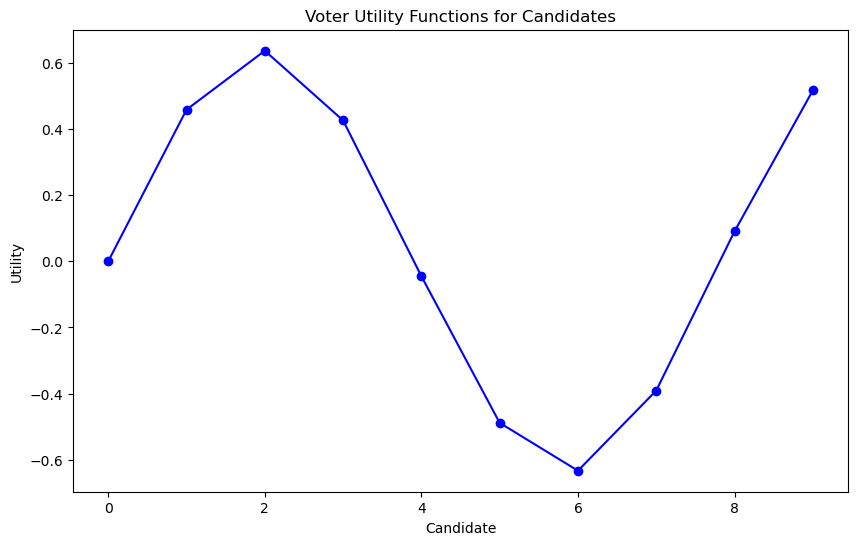

In [22]:
plt.figure(figsize=(10, 6))
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
        'magenta', 'yellow', 'black', 'teal', 'navy']
for i, voter in enumerate(VOTERS_X):
    utilities = [voter(c) for c in CANDIDATES]
    plt.plot(CANDIDATES, utilities, color=cmap[i % len(cmap)], marker='o', label=f'Voter {i+1}' if i < 10 else "")

# plt.plot(CANDIDATES, BS, label='Borda Scores', color='red', linewidth=2, marker='o')
plt.title('Voter Utility Functions for Candidates')
plt.xlabel('Candidate')
plt.ylabel('Utility')
plt.show()

In [23]:
BS = borda_scores(VOTERS_X, CANDIDATES)
one_round_ranking = np.argsort(-BS)
print(one_round_ranking)

[2 9 1 3 8 0 4 7 5 6]


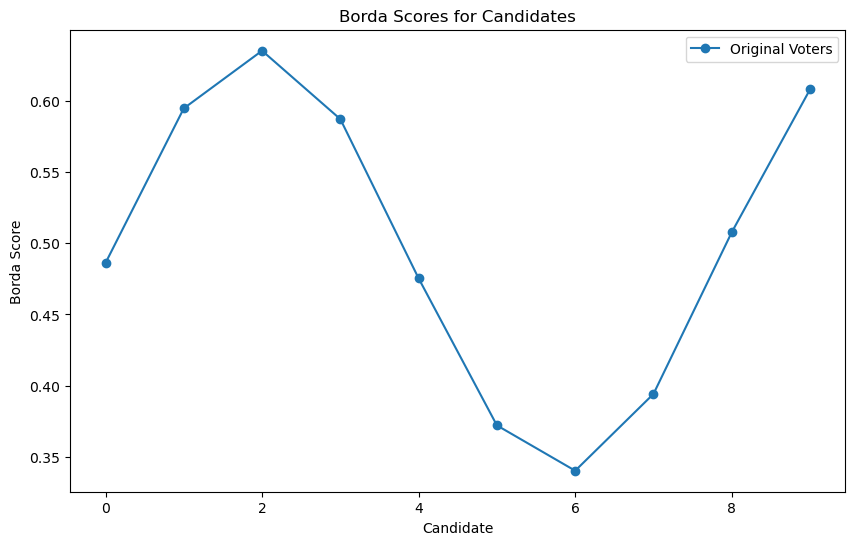

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(CANDIDATES, BS, label='Original Voters', marker='o')
plt.title('Borda Scores for Candidates')
plt.xlabel('Candidate')
plt.ylabel('Borda Score')
plt.legend()
plt.show()

In [25]:
winner_peeling = []
winner_peeling_scores = []
cands = copy.deepcopy(CANDIDATES)
for _ in range(NUM_CANDIDATES):
    BS1 = borda_scores(VOTERS_X, cands)
    winner = cands[np.argmax(BS1)]
    winner_peeling_scores.append(np.max(BS1))
    print(winner)
    winner_peeling.append(winner)
    cands = cands[cands != winner]  # Remove winner from candidates


2
9
1
3
8
0
4
7
5
6


In [26]:
winner_peeling

[2, 9, 1, 3, 8, 0, 4, 7, 5, 6]

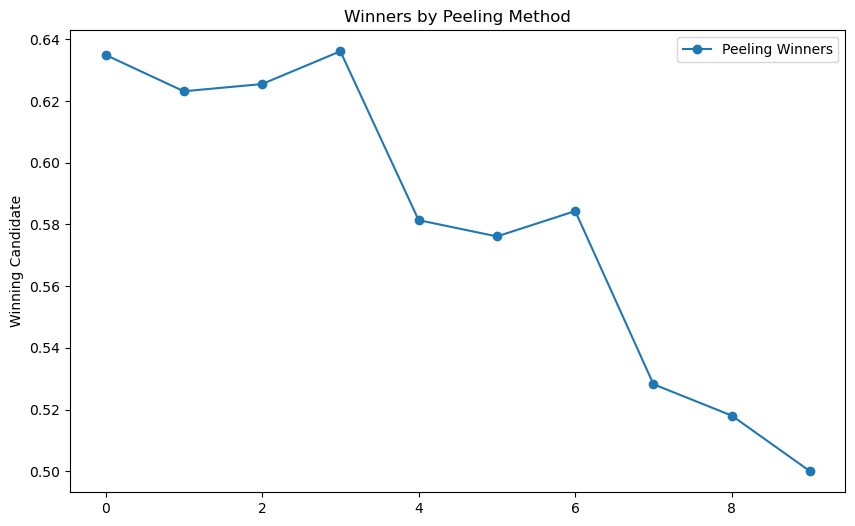

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(CANDIDATES, winner_peeling_scores, label='Peeling Winners', marker='o')
plt.title('Winners by Peeling Method')
# plt.xlabel('Round')
plt.ylabel('Winning Candidate')
plt.legend()
plt.show()

In [28]:
cands[cands != winner]

array([], dtype=int64)

## Toy Example

In [29]:
VOTERS = [
    lambda x: (1.0, 0.6, 0.0)[x],
    lambda x: (0.0, 1.0, 0.4)[x],
    lambda x: (0.2, 0.0, 1.0)[x]
]
CANDIDATES = np.array([0, 1, 2])

In [30]:
BS = borda_scores(VOTERS, CANDIDATES)

In [31]:
BS

array([0.48442884, 0.51586566, 0.4997055 ])

In [32]:
np.argsort(-BS)

array([1, 2, 0])

In [33]:
winner_peeling = []
BS = borda_scores(VOTERS, CANDIDATES)
winner = CANDIDATES[np.argmax(BS)]
winner_peeling.append(winner)

CANDIDATES = CANDIDATES[CANDIDATES != winner]
BS = borda_scores(VOTERS, CANDIDATES)
winner = CANDIDATES[np.argmax(BS)]
winner_peeling.append(winner)

In [34]:
winner_peeling

[1, 2]

In [35]:
np.random.random(3)

array([0.73759234, 0.03311407, 0.74794036])

In [36]:
for _ in range(1000):
    u1 = np.random.random(3)
    u2 = np.random.random(3)
    u3 = np.random.random(3)

    u = lambda ar: lambda i: ar[i]

    VOTERS = [
        u(u1),
        u(u2),
        u(u3)
    ]
    CANDIDATES = np.array([0, 1, 2])

    BS = borda_scores(VOTERS, CANDIDATES)
    borda_ranking = np.argsort(-BS)
    winner = CANDIDATES[np.argmax(BS)]
    winner_peel = [winner]

    CANDIDATES = CANDIDATES[CANDIDATES != winner]
    BS = borda_scores(VOTERS, CANDIDATES)
    winner = CANDIDATES[np.argmax(BS)]
    winner_peel.append(winner)

    remaining = CANDIDATES[CANDIDATES != winner][0]
    winner_peel.append(remaining)

    winner_peel = np.array(winner_peel)
    if (winner_peel != borda_ranking).any():
        # import ipdb; ipdb.set_trace()
        print(u1, u2, u3)
        print(borda_ranking)
        print(winner_peel)
        break
        

[0.18775743 0.8565209  0.05905804] [0.13351299 0.3528698  0.76333691] [0.76078117 0.10699129 0.25886054]
[1 2 0]
[1 0 2]


In [37]:
u1 = np.round(u1, 2)
u2 = np.round(u2, 2)
u3 = np.round(u3, 2)

In [38]:
u1

array([0.19, 0.86, 0.06])

In [39]:
u = lambda ar: lambda i: ar[i]

VOTERS = [
    u(u1),
    u(u2),
    u(u3)
]
CANDIDATES = np.array([0, 1, 2])

BS = borda_scores(VOTERS, CANDIDATES)
borda_ranking = np.argsort(-BS)
winner = CANDIDATES[np.argmax(BS)]
winner_peel = [winner]

CANDIDATES = CANDIDATES[CANDIDATES != winner]
BS = borda_scores(VOTERS, CANDIDATES)
winner = CANDIDATES[np.argmax(BS)]
winner_peel.append(winner)

remaining = CANDIDATES[CANDIDATES != winner][0]
winner_peel.append(remaining)

winner_peel = np.array(winner_peel)
if (winner_peel != borda_ranking).any():
    # import ipdb; ipdb.set_trace()
    print(u1, u2, u3)
    print(borda_ranking)
    print(winner_peel)

[0.19 0.86 0.06] [0.13 0.35 0.76] [0.76 0.11 0.26]
[1 2 0]
[1 0 2]
